# SF-DAT-21 | Unit Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

In [50]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna()
print df.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [51]:
# frequency table for prestige and whether or not someone was admitted
df.groupby(['prestige']).admit.value_counts(sort=False)

prestige   
1         0    28
          1    33
2         0    95
          1    53
3         0    93
          1    28
4         0    55
          1    12
dtype: int64

In [52]:
pd.crosstab(df.prestige, df.admit, rownames=['Prestige'], colnames=['admit'], margins=True)

admit,0,1,All
Prestige,,,
1.0,28,33,61
2.0,95,53,148
3.0,93,28,121
4.0,55,12,67
All,271,126,397


## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [60]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='d_prestige')
dummy_ranks.head()

,d_prestige_1.0,d_prestige_2.0,d_prestige_3.0,d_prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


#### Question 2.2. When modeling our class variables, how many do we need?

Answer: 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [61]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'd_prestige_1.0':])
print handCalc.head()

   admit  gre   gpa  d_prestige_1.0  d_prestige_2.0  d_prestige_3.0  \
0      0  380  3.61               0               0               1   
1      1  660  3.67               0               0               1   
2      1  800  4.00               1               0               0   
3      1  640  3.19               0               0               0   
4      0  520  2.93               0               0               0   

   d_prestige_4.0  
0               0  
1               0  
2               0  
3               1  
4               1  


In [62]:
# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(handCalc['d_prestige_1.0'], df.admit, rownames=['Prestige 1'], colnames=['admit'], margins=True)

admit,0,1,All
Prestige 1,,,
0.0,243,93,336
1.0,28,33,61
All,271,126,397


#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

In [42]:
61/397.0

0.15365239294710328

#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

In [43]:
336/397.0

0.8463476070528967

#### Question 3.3. Calculate the odds ratio.

In [45]:
61/336.0

0.18154761904761904

#### Question 3.4. Write this finding in a sentenance:

Answer: The odd ratio of someone getting admit to college with '#1' ranked prestige vs. not '#1' ranked prestige is 1:0.1815

#### Question 3.5. Print the cross tab for prestige_4.

In [63]:
pd.crosstab(handCalc['d_prestige_4.0'], df.admit, rownames=['Prestige 4'], colnames=['admit'], margins=True)

admit,0,1,All
Prestige 4,,,
0.0,216,114,330
1.0,55,12,67
All,271,126,397


#### Question 3.6. Calculate the OR.

In [47]:
67/330.0

0.20303030303030303

#### Question 3.7. Write this finding in a sentence.

Answer: The odd ratio of someone getting admit to college with '#4' ranked prestige vs. not '#4' ranked prestige is 1:0.2030

## Part 4. Analysis

In [64]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'd_prestige_2.0':])
print data.head()

   admit  gre   gpa  d_prestige_2.0  d_prestige_3.0  d_prestige_4.0
0      0  380  3.61               0               1               0
1      1  660  3.67               0               1               0
2      1  800  4.00               0               0               0
3      1  640  3.19               0               0               1
4      0  520  2.93               0               0               1


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [66]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,d_prestige_2.0,d_prestige_3.0,d_prestige_4.0,intercept
0,0,380,3.61,0,1,0,1
1,1,660,3.67,0,1,0,1
2,1,800,4.00,0,0,0,1
3,1,640,3.19,0,0,1,1
4,0,520,2.93,0,0,1,1


#### Question 4.1. Set the covariates to a variable called train_cols.

In [69]:
train_cols = data.columns[1:]
train_cols

Index([u'gre', u'gpa', u'd_prestige_2.0', u'd_prestige_3.0', u'd_prestige_4.0', u'intercept'], dtype='object')

#### Question 4.2. Fit the model.

In [71]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### Question 4.3. Print the summary results.

In [85]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Mar 2016   Pseudo R-squ.:                 0.08166
Time:                        10:31:37   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
gre                0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa                0.7793      0.333      2.344      0.019         0.128     1.431
d_prestige_2.0    -0.6801      0.317

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [74]:
result.params
np.exp(result.params)
# The expected change in one unit of GRE is roughly 

gre               1.002221
gpa               2.180027
d_prestige_2.0    0.506548
d_prestige_3.0    0.262192
d_prestige_4.0    0.211525
intercept         0.020716
dtype: float64

In [77]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                    2.5%     97.5%        OR
gre             1.000074  1.004372  1.002221
gpa             1.136120  4.183113  2.180027
d_prestige_2.0  0.272168  0.942767  0.506548
d_prestige_3.0  0.133377  0.515419  0.262192
d_prestige_4.0  0.093329  0.479411  0.211525
intercept       0.002207  0.194440  0.020716


#### Question 4.5. Interpret the OR of Prestige_2.

Answer: All else held constant, the admission odds ratio of rank 2 presitage to not rank 2 presitage is 0.5065.  Change from Presitige 2 to not Presitige 2 will double your chance in being admitted.

#### Question 4.6. Interpret the OR of GPA.

Answer:  All else held contant, the incremental one unit of GPA will increase your chance of being admitted by 2.18; 
or.. a one-unit increase in GPA is associated with an increase in the log odds of acceptance by 0.0022  (e^0.0022)

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [78]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [106]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### Question 5.1. Recreate the dummy variables.

In [107]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='d_prestige')
#dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'd_prestige_2.0':])

#### Question 5.2. Make predictions on the enumerated dataset.

In [108]:
train_cols = combos.columns[:]
combos['admit_pred'] = result.predict(combos[train_cols])

In [115]:
print combos.tail()

     gre       gpa  intercept  d_prestige_2.0  d_prestige_3.0  d_prestige_4.0  \
395  800  3.806667          1               0               0               1   
396  800  4.000000          1               0               0               0   
397  800  4.000000          1               1               0               0   
398  800  4.000000          1               0               1               0   
399  800  4.000000          1               0               0               1   

     admit_pred  
395    0.545972  
396    0.985399  
397    0.946509  
398    0.934534  
399    0.582995  


#### Question 5.3. Interpret findings for the last 4 observations.

Answer: The odd ratios of them being addmited over not beding admitted is 0.99, 0.95, 0.93, and 0.58 for the last four observations.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

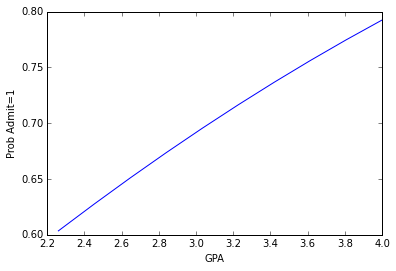

In [132]:
prob_admit = combos.groupby(['gpa']).admit_pred.mean()

pl.xlabel('GPA')
pl.ylabel('Prob Admit=1')
plt.plot(gpas, prob_admit)
plt.show()

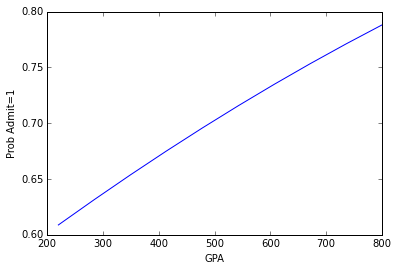

In [133]:
prob_admit = combos.groupby(['gre']).admit_pred.mean()

pl.xlabel('GPA')
pl.ylabel('Prob Admit=1')
plt.plot(gres, prob_admit)
plt.show()